In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [110]:
with pd.ExcelFile(r"D:\小鸡理财\百度云同步盘\小鸡理财\数据报告\用户类报告\大额用户\12月版本\大额用户.xlsx") as xlsx:
    df_kt = pd.read_excel(xlsx,'存管开通')
    df_md = pd.read_excel(xlsx,'名单')
    df_cg_tz = pd.read_excel(xlsx,'存管投资')
    df_cg_zht = pd.read_excel(xlsx,'智慧投')
    df_jd_tz = pd.read_excel(xlsx,'经典投资')
    df_jd_hk = pd.read_excel(xlsx,'经典回款')
    df_jd_cz = pd.read_excel(xlsx,'经典充值')
    df_cg_cz = pd.read_excel(xlsx,'存管充值')
    df_cg_hk = pd.read_excel(xlsx,'存管回款')

- 计算开通存管时间

In [4]:
df_kt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10333 entries, 0 to 10332
Data columns (total 38 columns):
序号         10333 non-null int64
用户ID       10333 non-null int64
用户名        10333 non-null object
真实姓名       10333 non-null object
邀请人        5141 non-null float64
手机号码       10333 non-null int64
VIP等级      10333 non-null int64
理财专员等级     10333 non-null int64
所属公司       821 non-null object
可用余额       10333 non-null float64
冻结金额       10333 non-null float64
待收金额       10333 non-null float64
礼金余额       10333 non-null int64
活期余额       10333 non-null int64
总余额        10333 non-null float64
注册时间       10333 non-null object
ip         10333 non-null object
归属地        10333 non-null object
注册来源       10333 non-null object
渠道         10333 non-null object
邀请渠道       10333 non-null object
VIP到期时间    10333 non-null object
新网认证时间     10333 non-null object
是否存量用户     10333 non-null object
存量激活时间     10333 non-null object
身份证        10333 non-null object
用户来源       10333 non-null object
首投时间 

In [5]:
df_kt_tmpt = df_kt.loc[:,['用户名','新网认证时间']]

In [6]:
df_kt_tmpt.head()

,用户名,新网认证时间
0,XJLC_492673132725b77a,2018-12-12 22:03:28
1,XJLC_193903132391b26b,2018-12-12 20:01:32
2,XJLC_309963131020feb9,2018-12-12 15:36:28
3,XJLC_67991313061e9206,2018-12-12 14:40:45
4,XJLC_84939313031c4183,2018-12-12 12:42:35


In [7]:
df_big_kt = pd.merge(df_md,df_kt_tmpt,
                    left_on='会员名',right_on='用户名',
                    how='left')

In [8]:
df_big_kt.head()

,真实姓名,手机号码,经典版用户名,会员名,身份证,年龄,用户名,新网认证时间
0,何秀梅,13429267258,13429267258,XJLC_7889513268782fbc,429001198009252968,38,XJLC_7889513268782fbc,2017-08-30 15:32:42
1,王蕾,13858369375,13858369375,XJLC_1098880684f4589,330203198106041824,37,XJLC_1098880684f4589,2017-08-30 13:58:46
2,徐少华,15355019587,sharwall,XJLC_5961175317357ec,330682199010046315,28,XJLC_5961175317357ec,2017-08-30 14:52:57
3,罗志伟,13314253797,13314253797,XJLC_866811633321f215,210302197509053317,43,XJLC_866811633321f215,2017-08-30 11:58:52
4,段春梅,18873906557,18873906557,XJLC_431263772713be3,62042219840221192X,34,XJLC_431263772713be3,2017-08-30 18:27:32


In [9]:
# 未开通人数
df_big_kt.isnull().sum()

真实姓名      0
手机号码      0
经典版用户名    0
会员名       0
身份证       0
年龄        0
用户名       7
新网认证时间    7
dtype: int64

In [10]:
df_big_kt.dtypes

真实姓名      object
手机号码       int64
经典版用户名    object
会员名       object
身份证       object
年龄         int64
用户名       object
新网认证时间    object
dtype: object

In [11]:
df_big_kt['新网认证时间'] = pd.to_datetime(df_big_kt['新网认证时间'])

In [12]:
df_big_kt['认证time'] =  df_big_kt['新网认证时间'].dt.strftime('%Y-%m')

In [13]:
df_big_kt.drop('用户名',axis=1,inplace=True)
df_big_kt.head()

,真实姓名,手机号码,经典版用户名,会员名,身份证,年龄,新网认证时间,认证time
0,何秀梅,13429267258,13429267258,XJLC_7889513268782fbc,429001198009252968,38,2017-08-30 15:32:42,2017-08
1,王蕾,13858369375,13858369375,XJLC_1098880684f4589,330203198106041824,37,2017-08-30 13:58:46,2017-08
2,徐少华,15355019587,sharwall,XJLC_5961175317357ec,330682199010046315,28,2017-08-30 14:52:57,2017-08
3,罗志伟,13314253797,13314253797,XJLC_866811633321f215,210302197509053317,43,2017-08-30 11:58:52,2017-08
4,段春梅,18873906557,18873906557,XJLC_431263772713be3,62042219840221192X,34,2017-08-30 18:27:32,2017-08


In [14]:
gp_kt = df_big_kt.groupby([df_big_kt['认证time']])['会员名'].count()

In [15]:
gp_kt

认证time
2017-08     18
2017-09     31
2017-10      3
2017-11      3
2017-12      4
2018-01     12
2018-02     75
2018-03    143
2018-04      3
2018-05      1
2018-06      1
2018-09      1
2018-10      1
2018-11      1
NaT          7
Name: 会员名, dtype: int64

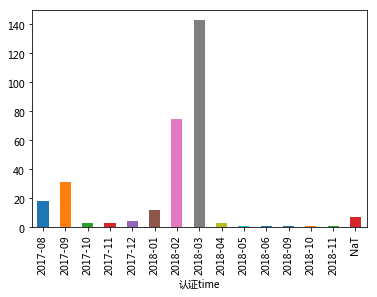

In [16]:
gp_kt.plot.bar()

- 计算投资额

In [17]:
df_md.head()

,真实姓名,手机号码,经典版用户名,会员名,身份证,年龄
0,何秀梅,13429267258,13429267258,XJLC_7889513268782fbc,429001198009252968,38
1,王蕾,13858369375,13858369375,XJLC_1098880684f4589,330203198106041824,37
2,徐少华,15355019587,sharwall,XJLC_5961175317357ec,330682199010046315,28
3,罗志伟,13314253797,13314253797,XJLC_866811633321f215,210302197509053317,43
4,段春梅,18873906557,18873906557,XJLC_431263772713be3,62042219840221192X,34


In [18]:
# 调整jupyter显示的最大列数
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', None)

In [19]:
df_cg_tz.head(2)

,投资状态,标状态,序号,标ID,标的编号,标名称,是否新手标,投资用户,真实姓名,手机号,所属公司,会员类型,投资时会员类型,推荐人,注册时间,智慧投ID,智慧投名称,智慧投基本年化,智慧投奖励年化,标类型,还款方式,总投资额,账户资金,续投资金,券,加息券成本,工资余额投资,预期收益,已得利息,投资时间,智慧投投资时间,预期还款时间,还款时间,复审时间,渠道,投资来源,邀请来源,首投时间,还款状态,还款方式.1,标种类型,投标方式,标限制,投资期限,年利率,加息利率,利息期数,下次发放,首投时间.1,身份证,用户来源
0,已支付,批量投资确认通过，还款中,6226,1220,HCYD180529-1220,凤宝宝6月-5期,否,XJLC_464161430236abec,张婷婷,18966042346,集团,VIP1,普通会员,NaN,2017-02-27 08:23,---,---,---,---,6月,按月先息后本,100.0,0.0,100.0,0,0.0,0,5.75,0.95,2018-05-30 11:13:52,---,2018-11-30,---,2018-05-30,平台,Web端,自主注册,2017-09-13,NaN,NaN,NaN,NaN,---,180,11.50%,0.00%,1/6,2018-07-30,2017-09-13,33032719950618290X,存管版
1,已支付,批量投资确认通过，还款中,6227,1220,HCYD180529-1220,凤宝宝6月-5期,否,XJLC_49136268889f0fc7,包友振,13777184528,NaN,VIP2,普通会员,XJLC_4772224262567b1a,2018-05-30 10:19,---,---,---,---,6月,按月先息后本,2000.0,1962.0,0.0,38,0.0,0,115.00,19.16,2018-05-30 11:06:13,---,2018-11-30,---,2018-05-30,OPPO软件商店,安卓端,普通邀请,2018-05-30,NaN,NaN,NaN,NaN,---,180,11.50%,0.00%,1/6,2018-07-30,2018-05-30,330211196505240039,存管版


In [20]:
df_cg_tz.columns

Index(['投资状态', '标状态', '序号', '标ID', '标的编号', '标名称', '是否新手标', '投资用户', '真实姓名',
       '手机号', '所属公司', '会员类型', '投资时会员类型', '推荐人', '注册时间', '智慧投ID', '智慧投名称',
       '智慧投基本年化', '智慧投奖励年化', '标类型', '还款方式', '总投资额', '账户资金', '续投资金', '券',
       '加息券成本', '工资余额投资', '预期收益', '已得利息', '投资时间', '智慧投投资时间', '预期还款时间', '还款时间',
       '复审时间', '渠道', '投资来源', '邀请来源', '首投时间', '还款状态', '还款方式.1', '标种类型', '投标方式',
       '标限制', '投资期限', '年利率', '加息利率', '利息期数', '下次发放', '首投时间.1', '身份证', '用户来源'],
      dtype='object')

In [21]:
df_cg_tz['标类型'].unique()

array(['6月', '3月', '12月', '30天'], dtype=object)

In [22]:
df_cg_tz_0 = df_cg_tz.loc[:,['投资用户','标类型','总投资额', '账户资金', '续投资金', '券','加息券成本','投资时间']]

In [23]:
df_cg_zht.columns

Index(['匹配状态', '投资ID', '用户名', '真实姓名', '手机号码', '身份证号码', '所属公司', 'VIP等级',
       '投资时VIP等级', '注册时间', '计划ID', '计划名称', '计划期限', '还款方式', '优惠券', '年利率',
       '奖励利率', '总投资金额', '新充金额', '续投金额', '匹配债权数目', '匹配金额', '未匹配金额', '解冻金额',
       '预期利息', '抵用券成本', '加息券成本', '加息标成本', '投资时间', '最早起息时间', '预计还款时间', '实际还款时间',
       '投资来源', '邀请来源', '渠道', '首投时间'],
      dtype='object')

In [24]:
df_cg_zht.head(2)

,匹配状态,投资ID,用户名,真实姓名,手机号码,身份证号码,所属公司,VIP等级,投资时VIP等级,注册时间,计划ID,计划名称,计划期限,还款方式,优惠券,年利率,奖励利率,总投资金额,新充金额,续投金额,匹配债权数目,匹配金额,未匹配金额,解冻金额,预期利息,抵用券成本,加息券成本,加息标成本,投资时间,最早起息时间,预计还款时间,实际还款时间,投资来源,邀请来源,渠道,首投时间
0,匹配完成,18321,XJLC_1436714351992cb4,吕丽莎,1.802021e+10,130427198707203926,NaN,VIP1,VIP1,2017-03-02,492,智慧投3月-88期,3月,按月先息后本,可用,9.50%,0.00%,5000.0,4933.75,56.25,1,5000.0,0,---,118.75,10,0.0,0.0,2018-06-30 23:42:11,2018-07-01 10:40:01,2018-10-01,---,安卓端,普通邀请,分享红包,2017-03-12 23:15:28
1,匹配完成,18320,XJLC_36793269782f668e,任碧华,1.525834e+10,330283199606075226,NaN,VIP0,VIP0,2018-06-07,500,智慧投1月-24期,1月,按月先息后本,可用,8.00%,0.00%,500.0,500.00,0.00,1,500.0,0,---,3.33,0,0.0,0.0,2018-06-30 23:33:06,2018-07-02 11:15:01,2018-08-02,---,安卓端,业务邀请,平台,2018-06-07 17:50:38


In [25]:
df_cg_zht_0 = df_cg_zht.loc[:,['用户名', '计划期限','总投资金额', '新充金额', '续投金额', '抵用券成本', '加息券成本','投资时间']]

In [26]:
df_jd_tz.columns

Index(['标名称', '投资用户', '手机号', '真实姓名', '所属公司', '注册时间', '标类型', '期限', '投标类型',
       '总投资额', '账户资金', '续投资金', '券', '工资余额投资', '预期收益', '加息券收益', '投资时间', '渠道',
       '投资来源', '邀请来源', '首投时间', '一级上线'],
      dtype='object')

In [27]:
df_jd_tz.head(2)

,标名称,投资用户,手机号,真实姓名,所属公司,注册时间,标类型,期限,投标类型,总投资额,账户资金,续投资金,券,工资余额投资,预期收益,加息券收益,投资时间,渠道,投资来源,邀请来源,首投时间,一级上线
0,新手标-438期,13983105209,13983105209,周到,NaN,2018-03-01,凤宝宝,7天,凤宝宝7天,10000,10000.0,0.0,0,0,35.0,0.0,2018-03-01,华为智汇云,安卓端,自主注册,2018-03-01,NaN
1,新手标-438期,15680631212,15680631212,李雪萍,NaN,2018-03-01,凤宝宝,7天,凤宝宝7天,10000,10000.0,0.0,0,0,35.0,0.0,2018-03-01,腾讯应用宝,安卓端,自主注册,2018-03-01,NaN


In [28]:
df_jd_tz_0 = df_jd_tz.loc[:,['投资用户', '期限','总投资额', '账户资金', '续投资金', '券','加息券收益', '投资时间']]

In [29]:
df_cg_tz_0.columns

Index(['投资用户', '标类型', '总投资额', '账户资金', '续投资金', '券', '加息券成本', '投资时间'], dtype='object')

In [30]:
df_cg_zht_0.columns

Index(['用户名', '计划期限', '总投资金额', '新充金额', '续投金额', '抵用券成本', '加息券成本', '投资时间'], dtype='object')

In [31]:
df_jd_tz_0.columns

Index(['投资用户', '期限', '总投资额', '账户资金', '续投资金', '券', '加息券收益', '投资时间'], dtype='object')

In [32]:
df_md_0 = df_md.loc[:,['经典版用户名','会员名']]

In [33]:
df_jd_tz_1 = pd.merge(df_jd_tz_0,df_md_0,
                     left_on = '投资用户',
                     right_on = '经典版用户名',
                     how = 'left')

In [34]:
df_jd_tz_1.dropna(inplace=True)

In [35]:
df_jd_tz_1.drop(columns=['投资用户','经典版用户名'],inplace=True)

In [36]:
df_jd_tz_1.head(3)

,期限,总投资额,账户资金,续投资金,券,加息券收益,投资时间,会员名
18,1月,70000,70000.0,0.0,0,0.0,2018-03-01,XJLC_97223139235c2c29
31,1月,100,65.0,35.0,0,0.0,2018-03-01,XJLC_44999147622b8f9f
55,1月,10600,0.0,10600.0,0,0.0,2018-03-01,XJLC_37086159447ca697


In [37]:
df_jd_tz_2 = df_jd_tz_1.rename(columns={'会员名':'用户名',
                                       '期限':'计划期限',
                                       '总投资额':'总投资金额',
                                       '账户资金':'新充金额',
                                       '续投资金':'续投金额',
                                       '券':'抵用券成本',
                                       '加息券收益':'加息券成本'})

In [38]:
df_cg_tz_1 = df_cg_tz_0.rename(columns={'投资用户':'用户名',
                                       '标类型':'计划期限',
                                       '总投资额':'总投资金额',
                                       '账户资金':'新充金额',
                                       '续投资金':'续投金额',
                                       '券':'抵用券成本',})

In [39]:
df_tz = pd.concat([df_cg_zht_0,df_cg_tz_1,df_jd_tz_2],ignore_index=True,sort=True)

In [40]:
df_tz.head(5)

,加息券成本,总投资金额,投资时间,抵用券成本,新充金额,用户名,续投金额,计划期限
0,0.0,5000.0,2018-06-30 23:42:11,10,4933.75,XJLC_1436714351992cb4,56.25,3月
1,0.0,500.0,2018-06-30 23:33:06,0,500.00,XJLC_36793269782f668e,0.00,1月
2,0.0,2000.0,2018-06-30 23:28:12,3,1997.00,XJLC_36793269782f668e,0.00,3月
3,0.0,36000.0,2018-06-30 23:07:42,0,36000.00,XJLC_29720262583681a7,0.00,1月
4,0.0,5000.0,2018-06-30 23:04:53,0,5000.00,XJLC_222471780481373f,0.00,1月


In [41]:
df_tz = df_tz.loc[df_tz['用户名'].isin(df_md['会员名'])]

In [42]:
df_tz.columns

Index(['加息券成本', '总投资金额', '投资时间', '抵用券成本', '新充金额', '用户名', '续投金额', '计划期限'], dtype='object')

In [43]:
df_tz['投资时间'] = pd.to_datetime(df_tz['投资时间'])

In [44]:
d = dict.fromkeys(['总投资金额', '新充金额','续投金额', '加息券成本', '抵用券成本'], np.sum)
d['用户名'] = lambda x: x.nunique()

gp_tz = df_tz.groupby(df_tz['投资时间'].dt.month).agg(d).rename(columns={'用户名':'投资人数'})

In [45]:
gp_tz

,总投资金额,新充金额,续投金额,加息券成本,抵用券成本,投资人数
投资时间,,,,,,
3,20643400.0,20149190.48,484871.52,148385.47,9338,202
4,17958000.0,16325018.40,1630820.60,133115.82,2161,172
5,18726300.0,16775448.85,1944478.15,49624.56,6373,185
6,18181400.0,13745849.86,4418247.14,7928.03,17303,190
7,15300300.0,9726596.48,5568504.52,70595.82,5199,157
8,17623200.0,11448753.24,6161194.76,135438.40,13252,155
9,17654700.0,10711136.60,6936876.40,56281.33,6687,159
10,12183300.0,6259051.53,5919106.47,88510.08,5142,150
11,13296500.0,8035142.88,5258051.12,48186.50,3306,156


In [46]:
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)

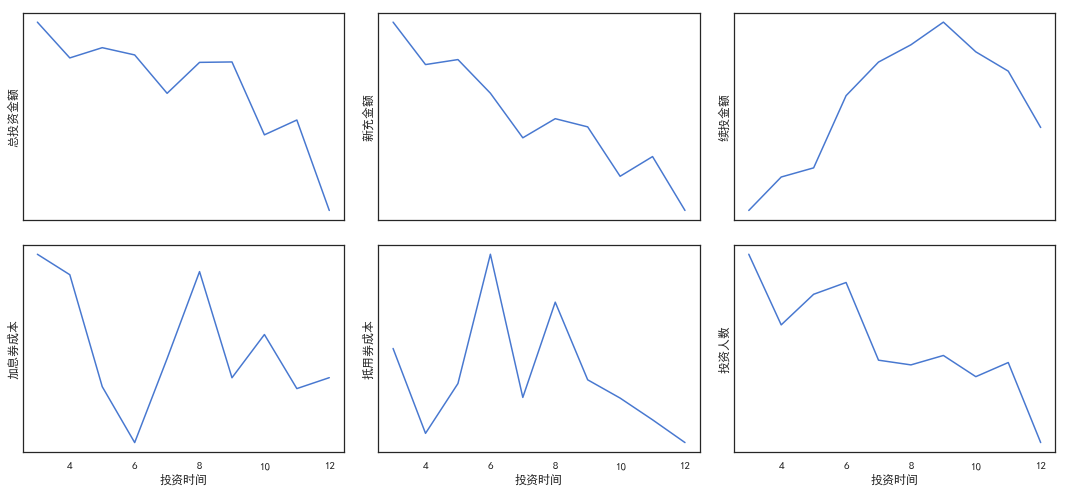

In [47]:
sns.set(style="white",palette="muted", color_codes=True,font=myfont.get_name())

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=True)

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=gp_tz.index, y=gp_tz.iloc[:,0],data=gp_tz, ax=axes[0, 0])

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=gp_tz.index, y=gp_tz.iloc[:,1],data=gp_tz, ax=axes[0, 1])

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=gp_tz.index, y=gp_tz.iloc[:,2],data=gp_tz, ax=axes[0,2])

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=gp_tz.index, y=gp_tz.iloc[:,3],data=gp_tz, ax=axes[1, 0])

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=gp_tz.index, y=gp_tz.iloc[:,4],data=gp_tz, ax=axes[1, 1])

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=gp_tz.index, y=gp_tz.iloc[:,5],data=gp_tz, ax=axes[1, 2])

plt.setp(axes, yticks=[])
plt.tight_layout()

- 计算各期限投资金额和人数

In [48]:
df_tz.head(3)

,加息券成本,总投资金额,投资时间,抵用券成本,新充金额,用户名,续投金额,计划期限
5,0.0,6000.0,2018-06-30 22:56:23,10,2677.94,XJLC_798299702fc4b6,3312.06,6月
22,0.0,10000.0,2018-06-30 20:17:34,18,8243.99,XJLC_18330166680d2bc2,1738.01,6月
23,0.0,10000.0,2018-06-30 19:54:21,50,3663.05,XJLC_93122140428db57d,6286.95,12月


In [49]:
df_tz['用户名'].nunique()

272

In [50]:
df_tz['计划期限'].unique()

array(['6月', '12月', '3月', '1月', '30天', '7天', '1月标', '3月标'], dtype=object)

In [51]:
qi = {'30天':'1月', '1月标':'1月', '3月标':'3月'}

df_tz_qixian = df_tz.copy()
df_tz_qixian['计划期限'] = df_tz_qixian['计划期限'].replace(qi)

In [52]:
df_tz_qixian.head(3)

,加息券成本,总投资金额,投资时间,抵用券成本,新充金额,用户名,续投金额,计划期限
5,0.0,6000.0,2018-06-30 22:56:23,10,2677.94,XJLC_798299702fc4b6,3312.06,6月
22,0.0,10000.0,2018-06-30 20:17:34,18,8243.99,XJLC_18330166680d2bc2,1738.01,6月
23,0.0,10000.0,2018-06-30 19:54:21,50,3663.05,XJLC_93122140428db57d,6286.95,12月


In [53]:
df_tz_qixian['计划期限'].value_counts()

12月    2932
3月     1690
6月     1635
1月     1273
7天        1
Name: 计划期限, dtype: int64

In [54]:
gp_tz_qixian_money = df_tz_qixian.groupby([df_tz['投资时间'].dt.month, df_tz_qixian['计划期限']])['总投资金额'].sum()

In [55]:
gp_tz_qixian_money = gp_tz_qixian_money.unstack()

In [56]:
gp_tz_qixian_money

计划期限,12月,1月,3月,6月,7天
投资时间,,,,,
3,12909000.0,2312000.0,2523400.0,2898500.0,500.0
4,10748000.0,NaN,3960600.0,3249400.0,NaN
5,8365000.0,1292800.0,6682700.0,2385800.0,NaN
6,7147000.0,2957900.0,4353300.0,3723200.0,NaN
7,8014000.0,1727600.0,2023900.0,3534800.0,NaN
8,8392000.0,3268000.0,2240500.0,3722700.0,NaN
9,8138000.0,3469200.0,3720900.0,2326600.0,NaN
10,4083000.0,2782400.0,2593300.0,2724600.0,NaN
11,4944000.0,3380400.0,2310700.0,2661400.0,NaN


In [57]:
gp_tz_qixian_people = df_tz_qixian.groupby([df_tz['投资时间'].dt.month, df_tz_qixian['计划期限']])['用户名'].agg({lambda x:x.nunique()})

In [58]:
gp_tz_qixian_people = gp_tz_qixian_people.unstack()

In [59]:
gp_tz_qixian_people

<lambda>                         
计划期限      12月    1月     3月     6月   7天
投资时间                                  
3       148.0  81.0   65.0   72.0  1.0
4       103.0   NaN   73.0   71.0  NaN
5       108.0  30.0  117.0   60.0  NaN
6       103.0  35.0  105.0  105.0  NaN
7        80.0  49.0   67.0   93.0  NaN
8        71.0  70.0   61.0   78.0  NaN
9        78.0  80.0   80.0   69.0  NaN
10       59.0  61.0   59.0   65.0  NaN
11       72.0  79.0   53.0   52.0  NaN
12       54.0  70.0   28.0   22.0  NaN

- 经典版回款续投比

In [60]:
# 1、计算回款名单

df_md_0.head()

,经典版用户名,会员名
0,13429267258,XJLC_7889513268782fbc
1,13858369375,XJLC_1098880684f4589
2,sharwall,XJLC_5961175317357ec
3,13314253797,XJLC_866811633321f215
4,18873906557,XJLC_431263772713be3


In [61]:
df_jd_hk_0 = pd.merge(df_jd_hk,df_md_0,
                     left_on='投资用户',right_on='经典版用户名',
                     how='left')

In [62]:
df_jd_hk_0.head(2)

,序号,标ID,编号,标名称,投资用户,真实姓名,大额用户,所属公司,会员类型,推荐人,注册时间,标类型,总投资额,账户资金,续投资金,券,工资余额投资,预期收益,利息,投资时间,还款时间,渠道,投资来源,邀请来源,首投时间,还款状态,还款方式,标种类型,投标方式,标限制,投资期限,年利率,加息利率,利息期数,发放时间,身份证,用户来源,经典版用户名,会员名
0,1,5092,HCSTO-2018030217180378198,新手标-439期,18858009365,贺丹露,普通用户,NaN,普通会员,85198789,2018-03-04 10:35,新手标7天,10000.0,10000.0,0.0,0,0,35.0,35.0,2018-03-04 10:45:20,2018-03-11,平台,安卓端,普通邀请,2018-03-04,已还款,NaN,NaN,NaN,---,新手标7天,14.00%,4.00%,0/1,2018-03-11,330903198507084321,非存管版,NaN,NaN
1,2,5092,HCSTO-2018030217180378198,新手标-439期,13857479191,吴萍,普通用户,NaN,普通会员,15958800059,2018-01-29 20:48,新手标7天,10000.0,10000.0,0.0,0,0,35.0,35.0,2018-03-04 10:41:32,2018-03-11,平台,苹果端,普通邀请,2018-03-04,已还款,NaN,NaN,NaN,---,新手标7天,14.00%,4.00%,0/1,2018-03-11,330211198211090548,非存管版,NaN,NaN


In [63]:
df_jd_hk_1 = df_jd_hk_0.loc[:,['还款时间','利息','总投资额','发放时间','会员名']].dropna()

In [64]:
df_jd_hk_1.head(10)

,还款时间,利息,总投资额,发放时间,会员名
25,2018-03-09,1.75,500.0,2018-03-09,XJLC_17222260706dd94d
73,2018-03-28,7.50,1000.0,2018-03-28,XJLC_92766231102005d0
74,2018-03-28,52.50,7000.0,2018-03-28,XJLC_92766231102005d0
83,2018-03-28,12.00,1600.0,2018-03-28,XJLC_815572312123614f
91,2018-03-28,49.50,6600.0,2018-03-28,XJLC_1756921605ecf83
103,2018-03-28,6.00,800.0,2018-03-28,XJLC_96978731342374b
106,2018-03-28,3.75,500.0,2018-03-28,XJLC_29118746045283c
107,2018-03-28,15.75,2100.0,2018-03-28,XJLC_56554746610353a
113,2018-03-28,375.00,50000.0,2018-03-28,XJLC_56554746610353a
118,2018-05-28,262.50,30000.0,2018-03-28,XJLC_29118746045283c


In [65]:
df_jd_hk_1.columns

Index(['还款时间', '利息', '总投资额', '发放时间', '会员名'], dtype='object')

In [66]:
def h(x1,x2,m,n):
    if x1 == x2:
        return m + n
    else:
        return m

df_jd_hk_1['回款金额'] =  df_jd_hk_1.apply(lambda x:h(x['还款时间'],x['发放时间'],x['利息'],x['总投资额']),axis=1)    

In [67]:
df_jd_hk_1.head()

,还款时间,利息,总投资额,发放时间,会员名,回款金额
25,2018-03-09,1.75,500.0,2018-03-09,XJLC_17222260706dd94d,501.75
73,2018-03-28,7.50,1000.0,2018-03-28,XJLC_92766231102005d0,1007.50
74,2018-03-28,52.50,7000.0,2018-03-28,XJLC_92766231102005d0,7052.50
83,2018-03-28,12.00,1600.0,2018-03-28,XJLC_815572312123614f,1612.00
91,2018-03-28,49.50,6600.0,2018-03-28,XJLC_1756921605ecf83,6649.50


In [68]:
df_big_hk = df_jd_hk_1.loc[:,['发放时间','回款金额','会员名']]

In [69]:
df_big_hk['发放时间'] = pd.to_datetime(df_big_hk['发放时间'])

In [70]:
df_big_hk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31457 entries, 25 to 92917
Data columns (total 3 columns):
发放时间    31457 non-null datetime64[ns]
回款金额    31457 non-null float64
会员名     31457 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 983.0+ KB


In [71]:
# 2、计算充值名单

df_cg_cz.head(3)

,订单号,会员名,真实姓名,用户类别,是否VIP,理财专员等级,注册时间,所属公司,充值方式,充值类型,充值银行,充值金额,充值时间,成功时间,充值状态,对帐订单号,身份证,用户来源
0,1,XJLC_45606260081d9f02,叶静,投资人,2,1,2018-02-09 19:43:02,NaN,新网好易付APP支付,NaN,NaN,14.80,2018-09-01 19:35:58,2018-09-01 19:36:23,充值成功,NaN,330227197503030383,存管版
1,2,XJLC_4694126592598fe7,李娇,投资人,5,1,2018-04-28 07:31:05,NaN,新网好易付APP支付,NaN,NaN,49078.84,2018-09-01 19:29:09,2018-09-01 19:29:39,充值成功,NaN,210106198005316143,存管版
2,3,XJLC_36724770636e08f,吴淑芳,投资人,4,1,2016-06-02 11:21:22,NaN,新网好易付APP支付,NaN,NaN,11900.00,2018-09-01 19:22:52,2018-09-01 19:23:17,充值成功,NaN,330211197204281042,存管版


In [72]:
df_cg_cz['充值状态'].unique()

array(['充值成功', '充值失败', '充值未完成'], dtype=object)

In [73]:
df_big_cg_cz = df_cg_cz.loc[((df_cg_cz['会员名'].isin(df_md['会员名'])) & (df_cg_cz['充值状态'] == '充值成功')),['会员名','充值金额','成功时间']]

In [74]:
df_big_cg_cz.head(3)

,会员名,充值金额,成功时间
2,XJLC_36724770636e08f,11900.00,2018-09-01 19:23:17
16,XJLC_7175623033187102,4991.59,2018-09-01 17:27:42
21,XJLC_90465231254f7656,1300.00,2018-09-01 16:53:37


In [75]:
df_big_cg_cz['充值时间'] = pd.to_datetime(df_big_cg_cz['成功时间']).dt.date

In [76]:
df_big_cg_cz.drop(columns='成功时间',inplace=True)

In [77]:
df_big_cz = df_big_cg_cz.copy()

In [78]:
df_big_cz['充值时间'] = pd.to_datetime(df_big_cz['充值时间'])

In [79]:
df_big_cz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704 entries, 2 to 46453
Data columns (total 3 columns):
会员名     5704 non-null object
充值金额    5704 non-null float64
充值时间    5704 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 178.2+ KB


In [80]:
# 3、计算新充投资名单

df_tz.head()

,加息券成本,总投资金额,投资时间,抵用券成本,新充金额,用户名,续投金额,计划期限
5,0.00,6000.0,2018-06-30 22:56:23,10,2677.94,XJLC_798299702fc4b6,3312.06,6月
22,0.00,10000.0,2018-06-30 20:17:34,18,8243.99,XJLC_18330166680d2bc2,1738.01,6月
23,0.00,10000.0,2018-06-30 19:54:21,50,3663.05,XJLC_93122140428db57d,6286.95,12月
36,0.15,100.0,2018-06-30 18:55:25,0,0.00,XJLC_1160612451948e76,100.00,3月
37,16.26,5000.0,2018-06-30 18:53:41,0,28.79,XJLC_44725143012de60d,4971.21,12月


In [81]:
df_big_xctz = df_tz.loc[df_tz['新充金额'] != 0,['新充金额','用户名','投资时间']]

In [82]:
df_big_xctz.rename(columns={'用户名':'会员名'},inplace=True)

In [83]:
df_big_xctz['投资时间'] = pd.to_datetime(df_big_xctz['投资时间']).dt.date

In [84]:
df_big_xctz.head(3)

,新充金额,会员名,投资时间
5,2677.94,XJLC_798299702fc4b6,2018-06-30
22,8243.99,XJLC_18330166680d2bc2,2018-06-30
23,3663.05,XJLC_93122140428db57d,2018-06-30


In [85]:
# 合并回款、充值、投资

In [86]:
gp_big_hk = df_big_hk.groupby(['发放时间','会员名'],as_index=False).sum()
gp_big_cz = df_big_cz.groupby(['充值时间','会员名'],as_index=False).sum()
gp_big_xctz = df_big_xctz.groupby(['投资时间','会员名'],as_index=False).sum()

In [87]:
gp_big_hk.rename(columns={'发放时间':'时间'},inplace=True)
gp_big_cz.rename(columns={'充值时间':'时间'},inplace=True)
gp_big_xctz.rename(columns={'投资时间':'时间'},inplace=True)

In [88]:
gp_big_hk['时间'] = gp_big_hk['时间'].astype(str)
gp_big_cz['时间'] = gp_big_cz['时间'].astype(str)
gp_big_xctz['时间'] = gp_big_xctz['时间'].astype(str)

In [89]:
gp_big_temp = pd.merge(gp_big_hk,gp_big_cz,on = ['时间','会员名'],how = 'outer')
gp_big_hcxt = pd.merge(gp_big_temp,gp_big_xctz,on = ['时间','会员名'],how = 'outer')

In [90]:
gp_big_hcxt.head(10)

,时间,会员名,回款金额,充值金额,新充金额
0,2018-03-01,XJLC_10205125931e8735,112.50,NaN,NaN
1,2018-03-01,XJLC_104361445515d9da,14254.84,NaN,NaN
2,2018-03-01,XJLC_1086772089feeda,620.00,NaN,NaN
3,2018-03-01,XJLC_11408146648d0a82,70.00,NaN,NaN
4,2018-03-01,XJLC_11571137588676b1,509.16,NaN,NaN
5,2018-03-01,XJLC_1160612451948e76,250.00,NaN,NaN
6,2018-03-01,XJLC_1173021837168a65,389.57,NaN,NaN
7,2018-03-01,XJLC_129251073681b6ac,191.66,NaN,NaN
8,2018-03-01,XJLC_133375107750b0b,120.16,NaN,NaN
9,2018-03-01,XJLC_1340516757d3a60,268.33,NaN,NaN


In [91]:
gp_big_hcxt.fillna(0,inplace=True)

In [92]:
# ！扩充每个用户的数据到20180301-20181217的每一天

In [93]:
time = pd.DataFrame({'时间':pd.date_range(start='20180301', end='20181217', freq='D')})

#构造一个二级行索引，使得每人对应20180301-20180731的每一天
index = pd.MultiIndex.from_product([time['时间'],df_md['会员名']], names = ['时间','会员名'])
s = pd.Series(1,index=index)

df_big_time = s.to_frame().reset_index()
del df_big_time[0]
df_big_time.head()

,时间,会员名
0,2018-03-01,XJLC_7889513268782fbc
1,2018-03-01,XJLC_1098880684f4589
2,2018-03-01,XJLC_5961175317357ec
3,2018-03-01,XJLC_866811633321f215
4,2018-03-01,XJLC_431263772713be3


In [94]:
df_big_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88768 entries, 0 to 88767
Data columns (total 2 columns):
时间     88768 non-null datetime64[ns]
会员名    88768 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [95]:
df_big_time['时间'] = df_big_time['时间'].astype(str)

In [96]:
gp_big_hcxt_0 = pd.merge(df_big_time,gp_big_hcxt,on=['时间','会员名'],how='left')

In [97]:
gp_big_hcxt_0[gp_big_hcxt_0['会员名'] == 'XJLC_10205125931e8735']

,时间,会员名,回款金额,充值金额,新充金额
262,2018-03-01,XJLC_10205125931e8735,112.50,0.00,0.00
566,2018-03-02,XJLC_10205125931e8735,NaN,NaN,NaN
870,2018-03-03,XJLC_10205125931e8735,NaN,NaN,NaN
1174,2018-03-04,XJLC_10205125931e8735,NaN,NaN,NaN
1478,2018-03-05,XJLC_10205125931e8735,24210.00,0.00,0.00
1782,2018-03-06,XJLC_10205125931e8735,NaN,NaN,NaN
2086,2018-03-07,XJLC_10205125931e8735,100.00,0.00,0.00
2390,2018-03-08,XJLC_10205125931e8735,NaN,NaN,NaN
2694,2018-03-09,XJLC_10205125931e8735,1125.00,0.00,0.00
2998,2018-03-10,XJLC_10205125931e8735,NaN,NaN,NaN


In [98]:
gp_big_hcxt_0.fillna(0,inplace=True)

In [99]:
gp_big_hcxt_0['累计还款'] = gp_big_hcxt_0.groupby(['会员名'])['回款金额'].apply(lambda x: x.cumsum())
gp_big_hcxt_0['累计充值'] = gp_big_hcxt_0.groupby(['会员名'])['充值金额'].apply(lambda x: x.cumsum())
gp_big_hcxt_0['累计投资'] = gp_big_hcxt_0.groupby(['会员名'])['新充金额'].apply(lambda x: x.cumsum())

In [100]:
# 累加值：还款>充值>账户

In [101]:
gp_big_hcxt_0['累计充值_ok'] = np.where(gp_big_hcxt_0['累计还款'] < gp_big_hcxt_0['累计充值'],gp_big_hcxt_0['累计还款'],gp_big_hcxt_0['累计充值'])
gp_big_hcxt_0['累计投资_ok'] = np.where(gp_big_hcxt_0['累计充值_ok'] < gp_big_hcxt_0['累计投资'],gp_big_hcxt_0['累计充值_ok'],gp_big_hcxt_0['累计投资'])

In [102]:
# 按日汇总数据

In [103]:
res_big_hcxt = gp_big_hcxt_0.groupby('时间')['累计还款','累计投资_ok'].sum()

In [104]:
res_big_hcxt.head()

,累计还款,累计投资_ok
时间,,
2018-03-01,1836076.25,35759.07
2018-03-02,3684216.99,393104.95
2018-03-03,5241237.65,660875.68
2018-03-04,5925898.99,796140.41
2018-03-05,7499547.48,845799.96


In [105]:
# 绘图

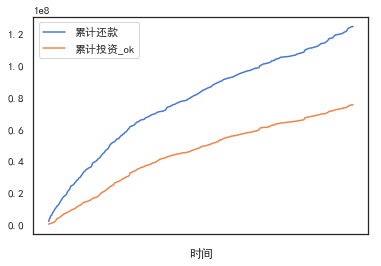

In [106]:
res_big_hcxt.plot()

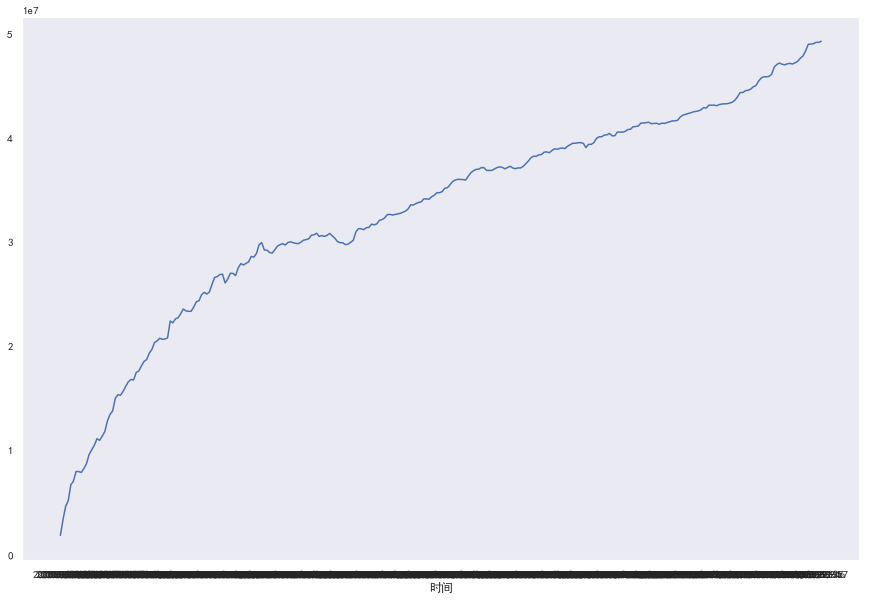

In [215]:
sns.set(style="dark", color_codes=True,font=myfont.get_name())
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10))

x = res_big_hcxt.index
y = res_big_hcxt.iloc[:,0] - res_big_hcxt.iloc[:,1]

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=x, y=y,color='b')

- 存管回款复投

In [107]:
# 计算存管回款

In [113]:
df_cg_hk.head(2)

,序号,标ID,编号,标名称,投资用户,真实姓名,手机号码,所属公司,会员类型,推荐人,注册时间,标类型,总投资额,账户资金,续投资金,券,工资余额投资,预期收益,投资时间,预期还款时间,还款时间,渠道,投资来源,邀请来源,首投时间,还款状态,还款方式,标种类型,投标方式,标限制,投资期限,年利率,加息利率,利息期数,预计本次发放时间,实际本次发放时间,本次发放金额,本次发放本金,总利息,加息标利息,加息券利息,身份证,用户来源
0,29,16,HCYD170912-016,新手标-3期,XJLC_73820227632287a4,杨于军,NaN,NaN,普通会员,NaN,2017-09-03 19:33,7,1000.0,1000.0,0.0,0,0,3.5,2017-09-13 10:34:45,2017-09-21,2017-09-21 09:40:01,平台,安卓端,NaN,2017-09-13,NaN,NaN,NaN,NaN,---,7,14.00%,4.00%,1/1,2017-09-21,2017-09-21,1003.5,1000.0,3.5,0.77,0.0,320113197104292815,存管版
1,30,16,HCYD170912-016,新手标-3期,XJLC_7849822826180b1e,杨银子,NaN,NaN,普通会员,NaN,2017-09-07 10:21,7,10000.0,10000.0,0.0,0,0,35.0,2017-09-13 10:45:39,2017-09-21,2017-09-21 09:40:01,平台,苹果端,NaN,2017-09-13,NaN,NaN,NaN,NaN,---,7,14.00%,4.00%,1/1,2017-09-21,2017-09-21,10035.0,10000.0,35.0,7.77,0.0,450324199111133167,存管版


In [137]:
df_big_cg_hk = df_cg_hk.loc[df_cg_hk['投资用户'].isin(df_md['会员名']),['投资用户','预计本次发放时间','本次发放金额']]

In [139]:
df_big_cg_hk.shape

(100396, 3)

In [140]:
df_big_cg_hk['预计本次发放时间'] = pd.to_datetime(df_big_cg_hk['预计本次发放时间'])

In [142]:
df_big_cg_hk = df_big_cg_hk.loc[(df_big_cg_hk['预计本次发放时间'] < '2018-12-18'),:]

In [153]:
df_big_cg_hk.rename(columns={'投资用户':'用户名','预计本次发放时间':'时间'},inplace=True)

In [154]:
df_big_cg_hk.tail()

,用户名,时间,本次发放金额
367034,XJLC_3370313479722b59,2018-12-14,17.12
367035,XJLC_3370313479722b59,2018-12-14,22.83
367036,XJLC_3370313479722b59,2018-12-14,14.84
367037,XJLC_3370313479722b59,2018-12-14,18.26
367098,XJLC_7175623033187102,2018-12-14,6.85


In [144]:
# 计算存管续投

In [121]:
df_xttz_0 = pd.concat([df_cg_zht_0,df_cg_tz_1],ignore_index=True,sort=True)

In [125]:
df_xttz_0['投资时间'] = pd.to_datetime(df_xttz_0['投资时间'])

In [145]:
df_xttz_1 = df_xttz_0.loc[(df_xttz_0['续投金额'] > 0),['续投金额','用户名','投资时间']]

In [155]:
df_xttz_1.rename(columns={'投资时间':'时间'},inplace=True)

In [156]:
df_xttz_1.head()

,续投金额,用户名,时间
0,56.25,XJLC_1436714351992cb4,2018-06-30
5,3312.06,XJLC_798299702fc4b6,2018-06-30
6,898.42,XJLC_61185203509295e5,2018-06-30
7,1093.79,XJLC_2160915453942657,2018-06-30
8,5990.00,XJLC_2212637645c0b95,2018-06-30


In [152]:
# 合并回款、续投表

In [158]:
df_big_cg_hk['时间'] = df_big_cg_hk['时间'].astype(str)
df_xttz_1['时间'] = df_xttz_1['时间'].astype(str)

In [162]:
gp_big_cg_hk = df_big_cg_hk.groupby(['时间','用户名'],as_index=False).sum()
gp_xttz = df_xttz_1.groupby(['时间','用户名'],as_index=False).sum()

In [163]:
df_big_hxt = pd.merge(gp_big_cg_hk,gp_xttz,
                    on=['时间','用户名'],
                    how='outer')

In [166]:
df_big_hxt.shape

(34219, 4)

In [177]:
df_big_hxt.rename(columns={'用户名':'会员名'},inplace=True)

In [178]:
df_big_hxt.head()

,时间,会员名,本次发放金额,续投金额
0,2017-09-25,XJLC_769362283057f647,10035.00,NaN
1,2017-10-09,XJLC_26421102338e087c,583.33,NaN
2,2017-10-09,XJLC_5136396112d,1678.16,NaN
3,2017-10-09,XJLC_7214674251acf4e,11.66,NaN
4,2017-10-09,XJLC_798299702fc4b6,11.66,NaN


In [181]:
df_big_hxt['时间'].min()

'2017-09-25'

In [182]:
# 将回款，续投记录扩充到20170925-20181217

In [183]:
time_2 = pd.DataFrame({'时间':pd.date_range(start='20170925', end='20181217', freq='D')})

#构造一个二级行索引，使得每人对应220170925-20181217的每一天
index_2 = pd.MultiIndex.from_product([time_2['时间'],df_md['会员名']], names = ['时间','会员名'])
s_2 = pd.Series(1,index=index_2)

df_big_time_2 = s_2.to_frame().reset_index()

df_big_time_2['时间'] = df_big_time_2['时间'].astype(str)

del df_big_time_2[0]

In [184]:
gp_big_hxt = pd.merge(df_big_time_2,df_big_hxt,on=['时间','会员名'],how='left')

In [188]:
gp_big_hxt.tail()

,时间,会员名,本次发放金额,续投金额
136491,2018-12-17,XJLC_7338272299c30de,0.0,0.0
136492,2018-12-17,XJLC_17222260706dd94d,0.0,0.0
136493,2018-12-17,XJLC_95630163264e9e31,0.0,0.0
136494,2018-12-17,XJLC_6704024289302afe,0.0,0.0
136495,2018-12-17,XJLC_8044924218466af1,0.0,0.0


In [187]:
gp_big_hxt.fillna(0,inplace=True)

In [189]:
gp_big_hxt['累计还款'] = gp_big_hxt.groupby(['会员名'])['本次发放金额'].apply(lambda x: x.cumsum())
gp_big_hxt['累计续投'] = gp_big_hxt.groupby(['会员名'])['续投金额'].apply(lambda x: x.cumsum())

In [102]:
# 按日汇总数据

In [190]:
res_big_hxt = gp_big_hxt.groupby('时间')['累计还款','累计续投'].sum()

In [191]:
res_big_hxt.head()

,累计还款,累计续投
时间,,
2017-09-25,10035.0,0.0
2017-09-26,10035.0,0.0
2017-09-27,10035.0,0.0
2017-09-28,10035.0,0.0
2017-09-29,10035.0,0.0


In [201]:
res_big_hxt.shape

(449, 2)

In [192]:
# 绘图

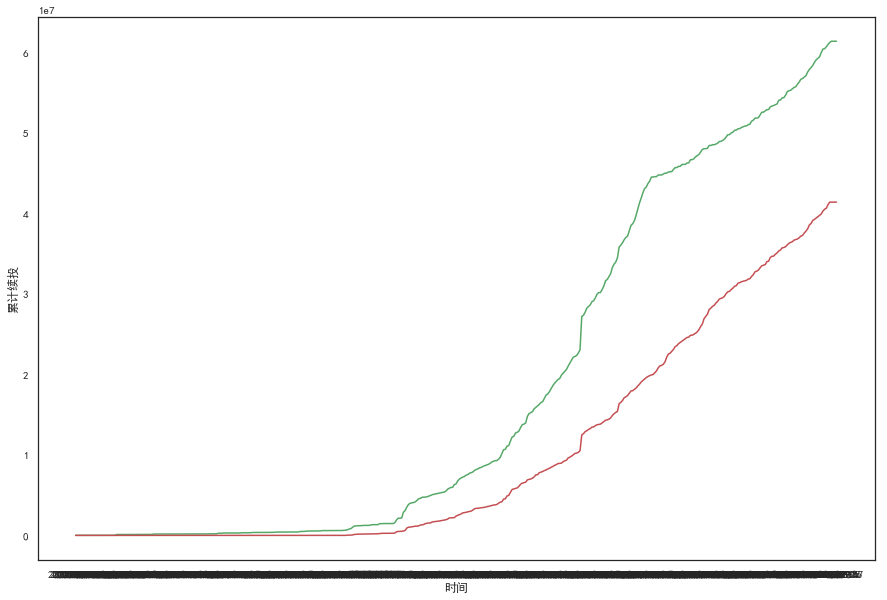

In [212]:
sns.set(style="white",palette="deep", color_codes=True,font=myfont.get_name())
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10))

x = res_big_hxt.index
y1 = res_big_hxt.iloc[:,0]
y2 = res_big_hxt.iloc[:,1]

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=x, y=y1,data=gp_big_hxt,color='g')
sns.lineplot(x=x, y=y2,data=gp_big_hxt,color='r')

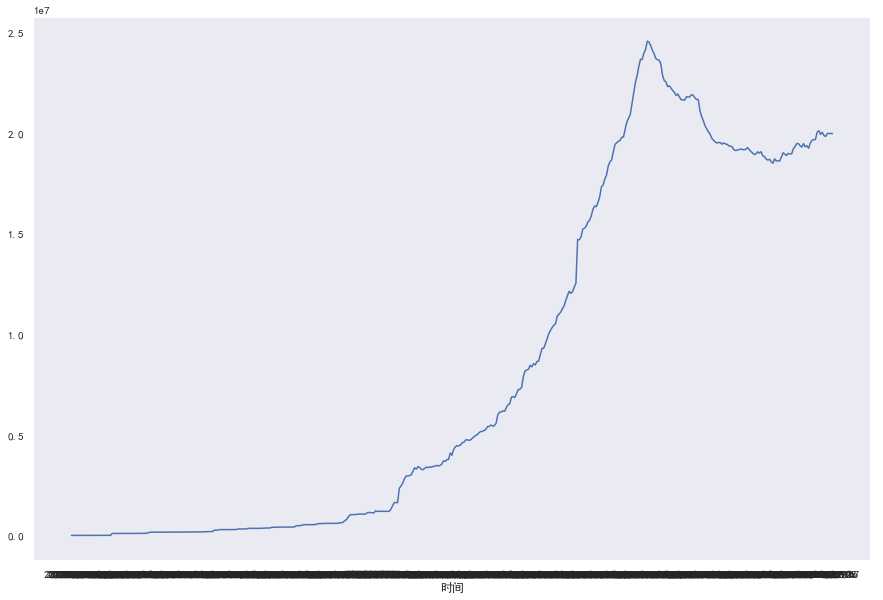

In [214]:
sns.set(style="dark", color_codes=True,font=myfont.get_name())
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10))

x = res_big_hxt.index
y = res_big_hxt.iloc[:,0] - res_big_hxt.iloc[:,1]

# Plot a simple histogram with binsize determined automatically
sns.lineplot(x=x, y=y,data=gp_big_hxt,color='b')